#### Fluorescence Plaques

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re

from PyPlaque.experiment import ExperimentFluorescencePlaque
from PyPlaque.utils import stitch_wells, remove_background, plot_virus_contours 
from PyPlaque.view import WellImageReadout, PlateReadout

np.random.seed(0)

/Users/de29/Applications/miniforge3/envs/pyplaque/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Initialising parameters and data

In [2]:
#loading multiple plates and plate masks as an experiment
base_dir = '../../../data_backup/samples_fluorescent_plaques/'
exp = ExperimentFluorescencePlaque(base_dir+'images',base_dir+'masks',params = None) # default values in class, option to update

In [3]:
#In this case, the individual plates are of 384 well plates for fluorescence plaques and
#their corresponding mask directories. Make sure to have similar directories for images and masks(even if empty)
plate_dirs, plate_mask_dirs = exp.get_individual_plates(folder_pattern=r'^200601')

print(plate_dirs, plate_mask_dirs)

#We are choosing via the pattern above to ignore all other plates other than this one
print(exp.get_number_of_plates())
 

['200601-zplate-g2'] ['200601-zplate-g2']
1


In [5]:
#Example considering 1 particular well A01 for channel w1 from the selected plate
plate_dict_w1 = exp.load_wells_for_plate_nuclei(plate_id=0,additional_subfolders='2020-06-03/2072',file_pattern=r'_A01_s1_w1')
print(plate_dict_w1.keys())

768it [00:00, 293238.55it/s]
  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:08<00:00,  8.46s/it]
1it [00:08,  8.46s/it]
1it [00:08,  8.46s/it]

dict_keys(['200601-zplate-g2'])


../../../data_backup/samples_fluorescent_plaques/images/200601-zplate-g2/2020-06-03/2072/200601-zplate-g2_A01_s1_w1.tif


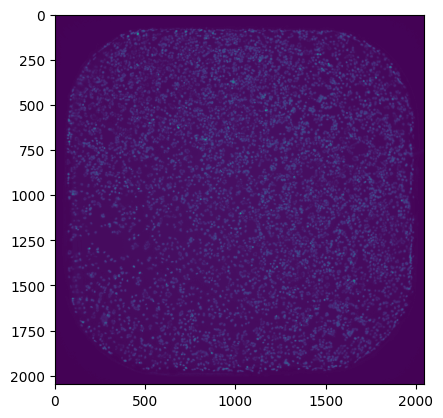

In [6]:
print(plate_dict_w1['200601-zplate-g2']['image_name'][0])
plt.imshow(plate_dict_w1['200601-zplate-g2']['img'][0])

In [7]:
#Example considering all wells for channel w1 from the selected plate
#Masks are generated based on the params given or the default at load time, masks can be saved in the mask directory for future use
plate_dict_w1 = exp.load_wells_for_plate_nuclei(plate_id=0,additional_subfolders='2020-06-03/2072',file_pattern=r'_w1') #'_([A-C]{1})1([1-4]{1})_s1_w1'
print(plate_dict_w1.keys())

0it [00:00, ?it/s]

768it [00:00, 145375.28it/s]
  0%|          | 0/384 [00:00<?, ?it/s]

100%|██████████| 384/384 [53:27<00:00,  8.35s/it]
384it [53:27,  8.35s/it]
384it [53:27,  8.35s/it]


dict_keys(['200601-zplate-g2'])


In [8]:
print(len(plate_dict_w1[plate_dirs[0]]['img']))

384


In [9]:
#Example considering all wells for channel w2 from the selected plate
#Masks are generated based on the params given or the default at load time, masks can be saved in the mask directory for future use
plate_dict_w2 = exp.load_wells_for_plate_virus(plate_id=0,additional_subfolders='2020-06-03/2072',file_pattern=r'_w2') #'_([A-C]{1})1([1-4]{1})_s1_w2'
print(plate_dict_w2.keys())

768it [00:00, 136071.70it/s]
100%|██████████| 384/384 [02:21<00:00,  2.71it/s]

dict_keys(['200601-zplate-g2'])


In [10]:
print(len(plate_dict_w2[plate_dirs[0]]['img']))

384


#### Well Stitching

In [13]:
# Stitching of multiple selected wells into a composite image shown using wells in channel w1, can also be done for w2
#The images should be in raster scan fashion from left to right, row by row
composite_img = stitch_wells(plate_dict_w1[plate_dirs[0]]['img'],nrows = 16,ncols = 24) #nrows = 3,ncols = 4
print(plate_dict_w1[plate_dirs[0]]['img'][0].shape)
print(composite_img.shape) 
#This shape should be (nrows*indiv_shape[0], ncolumns*indiv_shape[1]) where indiv_shape 
# is the shape of an individual well image



(2048, 2048)
(32768, 49152)


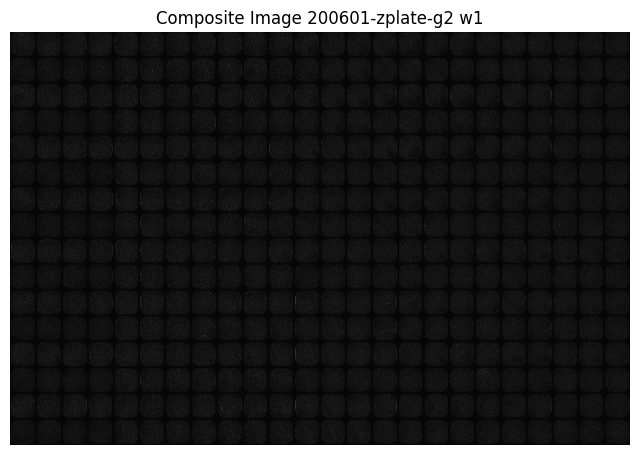

In [14]:
plt.figure(figsize=(8,12))
plt.title("Composite Image " + plate_dirs[0] + " w1")
plt.axis('off')

plt.imshow(composite_img, cmap='gray')

# The image is more clearly visible only after converting to 8/16bit and some 
# thresholding
# plt.savefig("../../../manuscript/figs/" + plate_dirs[0] + "_w1 Stitched images.png", 
# bbox_inches = 'tight', dpi=300)

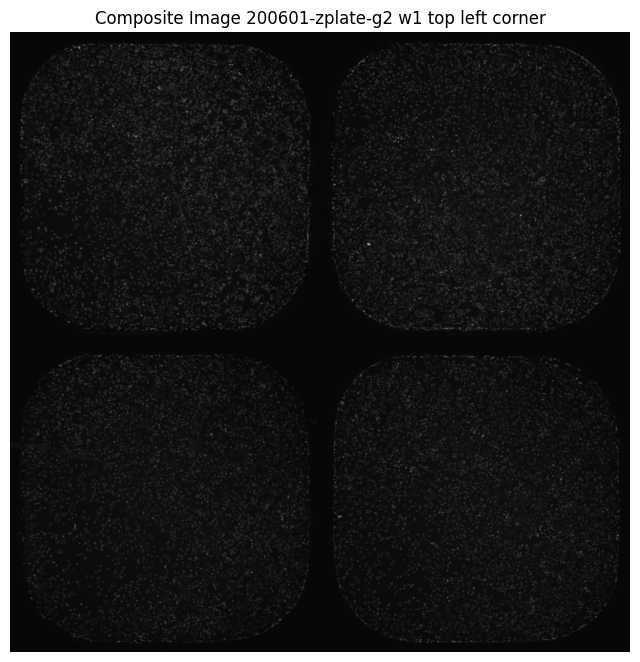

In [17]:
# we can also combine a portion of the images instead of all 

# change the tuple of indices to choose other wells to stitch
composite_img_corner = stitch_wells([plate_dict_w1[plate_dirs[0]]['img'][i] for i in (0,1,16,17)],nrows = 2,ncols = 2) #(0,1,4,5)

# OR
# change regex to choose other wells to stitch
img_list = [img for i,img in enumerate(plate_dict_w1[plate_dirs[0]]['img'])
            if len(re.findall(r'_([A-B]{1})0([1-2]{1})_s1_w1',
            str(plate_dict_w1[plate_dirs[0]]['image_name'][i]))) > 0] #'_([A-B]{1})1([1-2]{1})_s1_w1'

composite_img_corner = stitch_wells(img_list,nrows=2,ncols=2)
# this indicates the top left corner of the 384 well plate

plt.figure(figsize=(8,12))
plt.title("Composite Image " + plate_dirs[0] + " w1 top left corner")
plt.axis('off')

plt.imshow(composite_img_corner, cmap='gray')

# Use one of the two methods below to save
# plt.imsave(f"../../../manuscript/figs/" + plate_dirs[0] + "_w1 stitched top left corner.png", 
# composite_img_corner, cmap='gray')
# plt.savefig("../../../manuscript/figs/" + plate_dirs[0] + "_w1 stitched top left corner.png", 
# bbox_inches = 'tight', dpi=300)

In [20]:
img = plate_dict_w2[plate_dirs[0]]['img'][0]

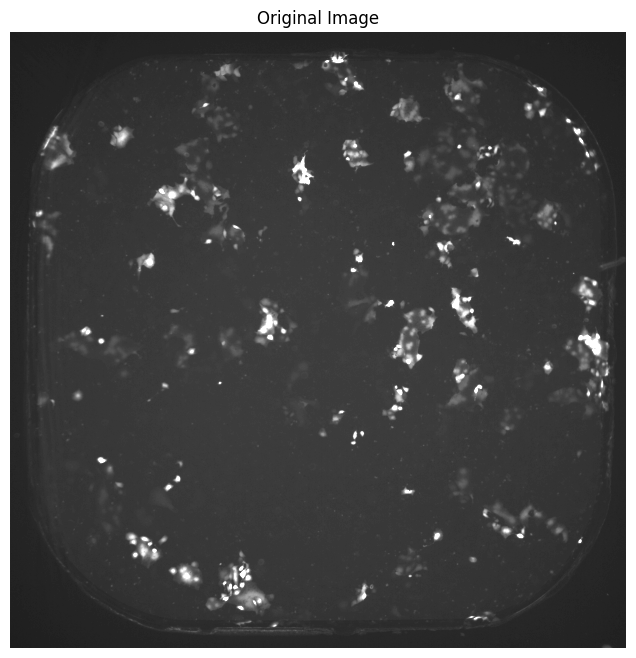

In [21]:
_, ax = plt.subplots(figsize=(8, 8))

# Display inputImage with custom colormap and intensity range
ax.imshow(img, cmap='gray', vmin=500, vmax=6000, alpha=1, extent=[0, 
                                            img.shape[1], img.shape[0], 0])
ax.axis('off')

ax.set_title('Original Image')
# plt.savefig("../../../manuscript/figs/fp_original_image_w2.png", bbox_inches='tight')
plt.show()

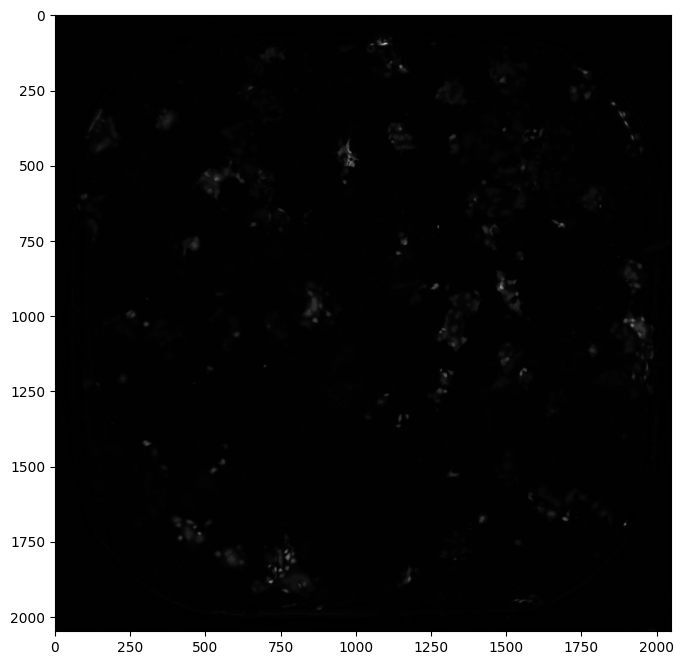

In [22]:
_, bg_removed_img = remove_background(img,
                                  radius=exp.params['virus']['correction_ball_radius'])

_, ax = plt.subplots(figsize=(8, 8))
ax.imshow(bg_removed_img,cmap='gray')
plt.show()

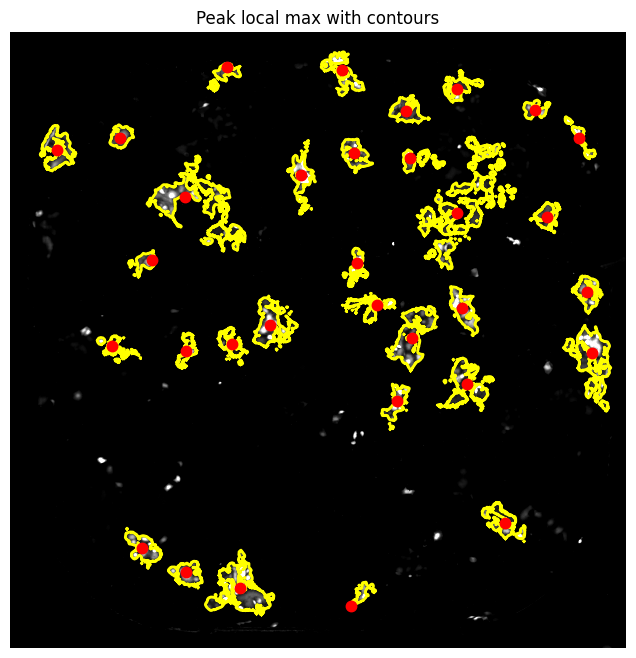

In [23]:
# Plotting the plaque contours along with the peak local maxima in each region
plot_virus_contours(img,virus_params=exp.params['virus'])

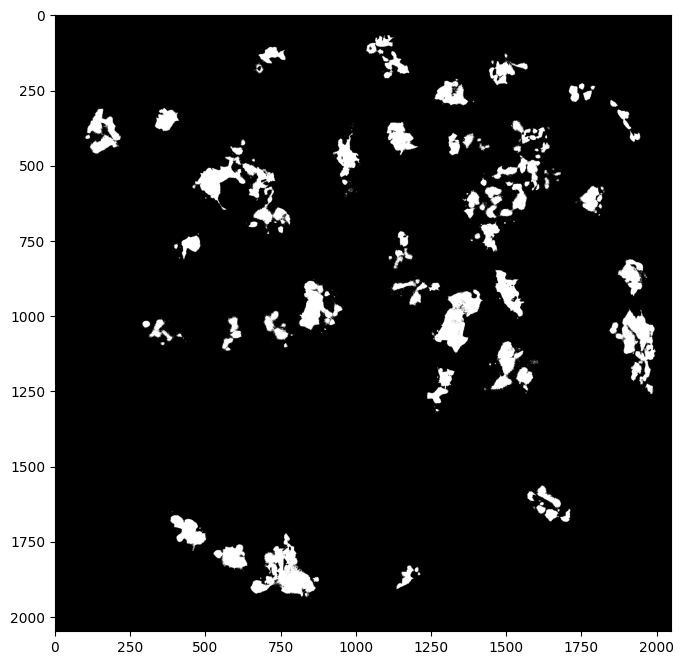

In [24]:
_, ax = plt.subplots(figsize=(8, 8))
ax.imshow(plate_dict_w2[plate_dirs[0]]['mask'][0],cmap='gray')
plt.show()

In [35]:
img = plate_dict_w1[plate_dirs[0]]['img'][0]

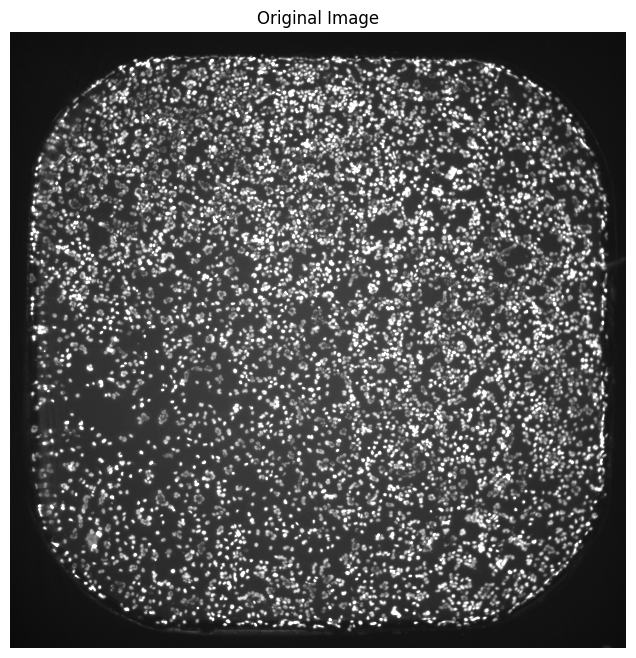

In [36]:
_, ax = plt.subplots(figsize=(8, 8))

# Display inputImage with custom colormap and intensity range
ax.imshow(img, cmap='gray', vmin=500, vmax=6000, alpha=1, extent=[0, 
                                            img.shape[1], img.shape[0], 0])
ax.axis('off')

ax.set_title('Original Image')
# plt.savefig("../../../manuscript/figs/fp_original_image_w1.png", bbox_inches='tight')
plt.show()

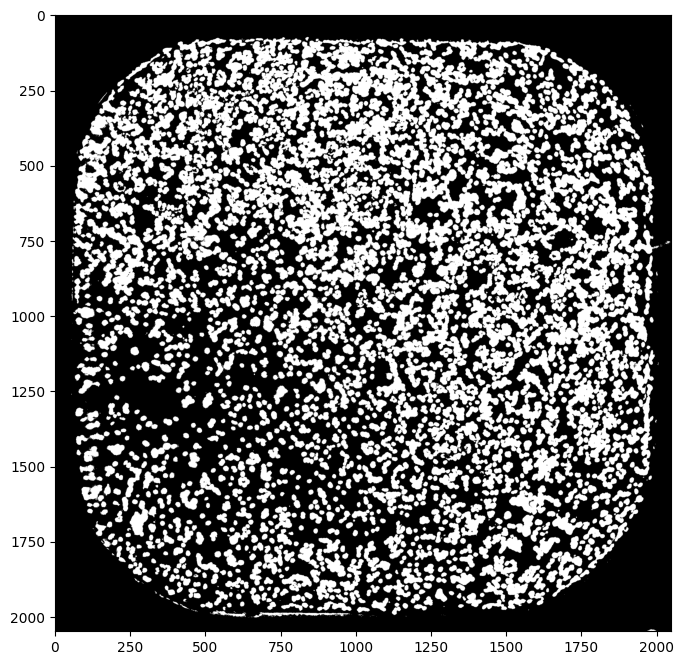

In [37]:
_, ax = plt.subplots(figsize=(8, 8))
ax.imshow(plate_dict_w1[plate_dirs[0]]['mask'][0],cmap='gray')
plt.show()

In [38]:
# Generating readouts for images as in PyPlaque
plate_readout = PlateReadout(experiment = exp, plate_id = 0, well_level_readouts=True, object_level_readouts=True)
abs_df_image, abs_df_object = plate_readout.generate_readouts_dataframe() # make sure to add row and column patterns here

100%|██████████| 384/384 [15:23<00:00,  2.41s/it]


In [39]:
abs_df_image

,NucleiImageName,VirusImageName,maxNucleiIntensity,totalNucleiIntensity,meanNucleiIntensity,numberOfNuclei,maxVirusIntensity,totalVirusIntensity,meanVirusIntensity,numberOfPlaques,numberOfInfectedNuclei
0,200601-zplate-g2_A01_s1_w1.tif,200601-zplate-g2_A01_s1_w2.tif,32308,9.286470e+09,1023.500000,18275,37322,7327763701,1747.075010,32,2165
1,200601-zplate-g2_A02_s1_w1.tif,200601-zplate-g2_A02_s1_w2.tif,32760,9.153714e+09,1023.502115,18372,45051,7505195868,1789.378135,30,2538
2,200601-zplate-g2_A03_s1_w1.tif,200601-zplate-g2_A03_s1_w2.tif,32689,9.248216e+09,1023.500556,18185,31160,7630521258,1819.258036,41,3619
3,200601-zplate-g2_A04_s1_w1.tif,200601-zplate-g2_A04_s1_w2.tif,32732,9.107313e+09,1023.500000,18269,53822,7526026914,1794.344643,30,3256
4,200601-zplate-g2_A05_s1_w1.tif,200601-zplate-g2_A05_s1_w2.tif,32760,9.052582e+09,1023.733628,17722,51669,7437289993,1773.188112,28,2726
...,...,...,...,...,...,...,...,...,...,...,...
379,200601-zplate-g2_P20_s1_w1.tif,200601-zplate-g2_P20_s1_w2.tif,31874,8.420142e+09,1023.499938,16564,23784,6707526805,1599.199010,0,0
380,200601-zplate-g2_P21_s1_w1.tif,200601-zplate-g2_P21_s1_w2.tif,32692,8.274983e+09,1023.500255,16279,17203,6759969589,1611.702344,0,0
381,200601-zplate-g2_P22_s1_w1.tif,200601-zplate-g2_P22_s1_w2.tif,32127,8.381441e+09,1023.499818,16444,16584,6768408080,1613.714237,0,0
382,200601-zplate-g2_P23_s1_w1.tif,200601-zplate-g2_P23_s1_w2.tif,29627,7.926082e+09,1023.500000,15224,56963,6721685174,1602.574628,0,0


In [40]:
abs_df_object

,wellRow,wellColumn,Area,Centroid_1,Centroid_2,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Roundness,numberOfPeaks,numberOfNucleiInPlaque,numberOfInfectedNucleiInPlaque,maxIntensityGFP,totalIntensityGFP,meanIntensityGFP
0,A,01,5751.968750,779.354547,1152.336421,132.380125,73.014855,0.787246,8976.062500,0.267066,1.0,58.320956,46.412132,11871.812500,2.043244e+07,55.359951
1,A,02,7191.766667,1015.005792,981.926309,130.682315,78.943512,0.745286,11420.733333,0.279096,1.0,70.430196,51.333333,13636.000000,2.882249e+07,59.285028
2,A,03,6151.740000,1007.292569,1007.246519,129.229685,78.555681,0.740695,9770.620000,0.272435,1.0,58.503765,46.063765,12213.860000,2.171966e+07,56.647467
3,A,04,8649.562500,1097.021821,988.087295,161.363700,86.831082,0.788209,13666.125000,0.267983,1.0,79.509926,61.627206,15030.250000,3.259878e+07,67.890325
4,A,05,6435.305556,949.258704,1075.016362,131.523756,78.214232,0.743000,9890.777778,0.270576,1.0,60.426797,46.902941,10471.888889,2.349374e+07,57.254136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,P,20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000
380,P,21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000
381,P,22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000
382,P,23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000


In [41]:
# Generating readouts for each well and individual readouts can be accessed as well
well_image_readout = WellImageReadout(nuclei_image_name=str(plate_dict_w1['200601-zplate-g2']
                                       ['image_name'][0]),
                         plaque_image_name=str(plate_dict_w2['200601-zplate-g2']['image_name'][0]),
                         nuclei_image=np.array(plate_dict_w1['200601-zplate-g2']['img'][0]),
                         plaque_image=np.array(plate_dict_w2['200601-zplate-g2']['img'][0]),
                         nuclei_mask=np.array(plate_dict_w1['200601-zplate-g2']['mask'][0]),
                         plaque_mask=np.array(plate_dict_w2['200601-zplate-g2']['mask'][0]),
                         virus_params = exp.params['virus'])

In [55]:
print(well_image_readout.get_nuclei_image_name())
print(well_image_readout.get_row(row_pattern = r'([A-Z]{1})[0-9]{2}'))
print(well_image_readout.get_column(column_pattern = r'[A-Z]{1}([0-9]{2})'))
print(well_image_readout.get_max_nuclei_intensity())
print(well_image_readout.get_total_nuclei_intensity())
print(well_image_readout.get_mean_nuclei_intensity())
print(well_image_readout.get_nuclei_count())

../../../data_backup/samples_fluorescent_plaques/images/200601-zplate-g2/2020-06-03/2072/200601-zplate-g2_A01_s1_w1.tif
A
01
32308
9286469919.0
1023.5
18275


In [56]:
print(well_image_readout.get_plaque_image_name())
print(well_image_readout.get_row(row_pattern = r'([A-Z]{1})[0-9]{2}'))
print(well_image_readout.get_column(column_pattern = r'[A-Z]{1}([0-9]{2})'))
print(well_image_readout.get_max_plaque_intensity())
print(well_image_readout.get_total_plaque_intensity())
print(well_image_readout.get_mean_plaque_intensity())
print(well_image_readout.get_median_plaque_intensity())
print(well_image_readout.get_plaque_count())
print(well_image_readout.get_infected_nuclei_count())
print(well_image_readout.get_lesion_area())

../../../data_backup/samples_fluorescent_plaques/images/200601-zplate-g2/2020-06-03/2072/200601-zplate-g2_A01_s1_w2.tif
A
01
37322
7327763701
1747.0750095844269
1697.0
32
2165
220553


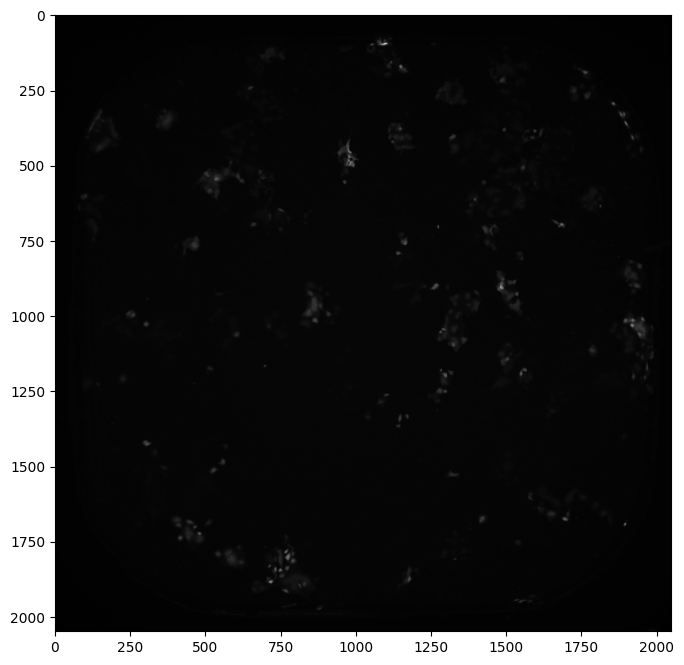

In [57]:
_, ax = plt.subplots(figsize=(8, 8))
ax.imshow(well_image_readout.plaque_image,cmap='gray')
plt.show()

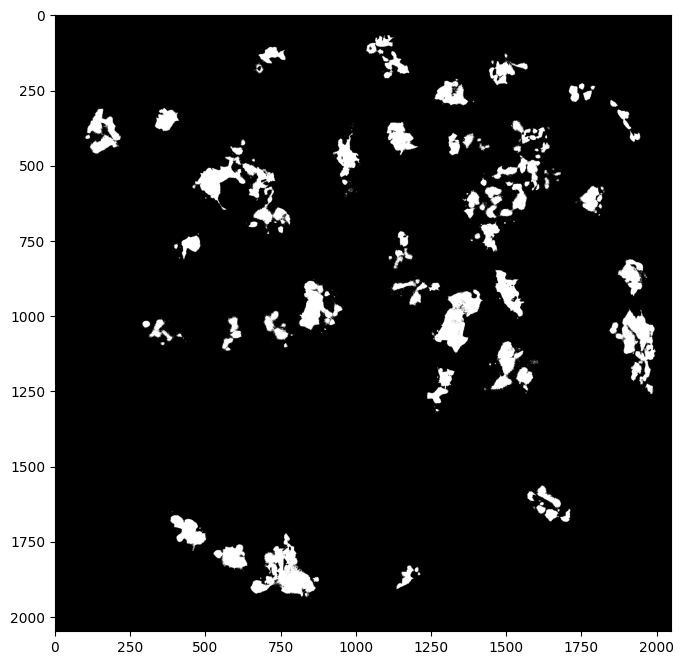

In [58]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(well_image_readout.plaque_mask,cmap='gray')
plt.show()

In [59]:
# Generating readouts for objects in PyPlaque
plq_objects = well_image_readout.get_plaque_objects()
len(plq_objects)

32

In [60]:
plq_object_readout = well_image_readout.call_plaque_object_readout(plq_objects[0],exp.params['virus'])

In [61]:
print(plq_object_readout.get_row(row_pattern = r'([A-Z]{1})[0-9]{2}'))
print(plq_object_readout.get_column(column_pattern = r'[A-Z]{1}([0-9]{2})'))
print(plq_object_readout.get_area())
print(plq_object_readout.get_centroid())
print(plq_object_readout.get_bbox())
print(plq_object_readout.get_major_minor_axis_length())
print(plq_object_readout.get_eccentricity())
print(plq_object_readout.get_convex_area())
print(plq_object_readout.roundness())
print(len(plq_object_readout.get_number_of_peaks()))
print(plq_object_readout.get_nuclei_in_plaque())
print(plq_object_readout.get_infected_nuclei_in_plaque())
print(plq_object_readout.get_max_intensity_GFP())
print(plq_object_readout.get_total_intensity_GFP())
print(plq_object_readout.get_mean_intensity_GFP())

A
01
2355.0
(96.55159235668789, 1078.248407643312)
(67, 1126, 63, 91)
(101.86910750639917, 40.0889967105472)
0.9193098970206801
3753.0
0.24477380635520882
1
22.71764705882353
22.658823529411766
37322
12418626
38.43192133131619


In [62]:
img = plate_dict_w2[plate_dirs[0]]['img'][0]
pad = 10
crop = img[(plq_object_readout.get_bbox()[0]-pad) : (plq_object_readout.get_bbox()[0]+plq_object_readout.get_bbox()[2]+pad),
        (plq_object_readout.get_bbox()[1]-plq_object_readout.get_bbox()[3]-pad) : (plq_object_readout.get_bbox()[1]+pad)]

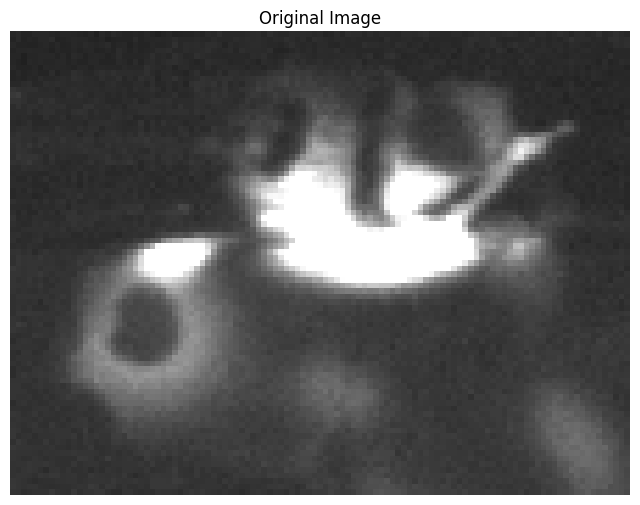

In [63]:
_, ax = plt.subplots(figsize=(8, 8))

# Display inputImage with custom' colormap and intensity range
ax.imshow(crop, cmap='gray', vmin=500, vmax=6000, alpha=1, extent=[0, 
                                            crop.shape[1], crop.shape[0], 0])
ax.axis('off')

ax.set_title('Original Image')
# plt.savefig("../../../manuscript/figs/fp_original_plaque_image_w2.png", bbox_inches='tight')
plt.show()